# Data Exploration and Preparation: SPAM E-mail Database Analysis


### This project aims to perform an exploratory data analysis (EDA) and dimensionality reduction using Principal Component Analysis (PCA) on the SPAM E-mail Database dataset.

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [44]:
data=pd.read_csv("spambase.csv",na_values=['???','none'])

In [45]:
print('Data shape:', data.shape)


Data shape: (4601, 59)


In [46]:
data.head(5)

,Unnamed: 0,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,is_spam
0,0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,True
1,1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,True
2,2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,True
3,3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,True
4,4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,True


In [47]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4601 entries, 0 to 4600
Data columns (total 59 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Unnamed: 0                  4601 non-null   int64  
 1   word_freq_make              4601 non-null   float64
 2   word_freq_address           4601 non-null   float64
 3   word_freq_all               4595 non-null   float64
 4   word_freq_3d                4599 non-null   float64
 5   word_freq_our               4600 non-null   float64
 6   word_freq_over              4600 non-null   float64
 7   word_freq_remove            4601 non-null   float64
 8   word_freq_internet          4586 non-null   float64
 9   word_freq_order             4601 non-null   float64
 10  word_freq_mail              4601 non-null   float64
 11  word_freq_receive           4601 non-null   float64
 12  word_freq_will              4601 non-null   float64
 13  word_freq_people            4601 

In [48]:
data.describe()

,Unnamed: 0,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,...,word_freq_conference,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total
count,4601.000000,4601.000000,4601.000000,4595.000000,4599.000000,4600.000000,4600.000000,4601.000000,4586.000000,4601.000000,...,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000
mean,2300.000000,0.104553,0.213015,0.281023,0.065453,0.312291,0.095922,0.114208,0.105639,0.090067,...,0.031869,0.038575,0.139030,0.016976,0.269071,0.075811,0.044238,5.191515,52.172789,283.289285
std,1328.338624,0.305358,1.290575,0.504370,1.395454,0.672570,0.273850,0.391441,0.401682,0.278616,...,0.285735,0.243471,0.270355,0.109394,0.815672,0.245882,0.429342,31.729449,194.891310,606.347851
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,1150.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.588000,6.000000,35.000000
50%,2300.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.065000,0.000000,0.000000,0.000000,0.000000,2.276000,15.000000,95.000000
75%,3450.000000,0.000000,0.000000,0.420000,0.000000,0.382500,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.188000,0.000000,0.315000,0.052000,0.000000,3.706000,43.000000,266.000000
max,4600.000000,4.540000,14.280000,5.100000,42.810000,10.000000,5.880000,7.270000,11.110000,5.260000,...,10.000000,4.385000,9.752000,4.081000,32.478000,6.003000,19.829000,1102.500000,9989.000000,15841.000000


In [49]:
data.isnull().sum()

Unnamed: 0                      0
word_freq_make                  0
word_freq_address               0
word_freq_all                   6
word_freq_3d                    2
word_freq_our                   1
word_freq_over                  1
word_freq_remove                0
word_freq_internet             15
word_freq_order                 0
word_freq_mail                  0
word_freq_receive               0
word_freq_will                  0
word_freq_people                0
word_freq_report                0
word_freq_addresses             9
word_freq_free                  0
word_freq_business              0
word_freq_email                 0
word_freq_you                   0
word_freq_credit                0
word_freq_your                  0
word_freq_font                  0
word_freq_000                   1
word_freq_money                 0
word_freq_hp                    0
word_freq_hpl                   1
word_freq_george                0
word_freq_650                   0
word_freq_lab 

In [50]:
data = data.drop_duplicates().reset_index(drop=True)
print('After dropping duplicates:', data.shape)

After dropping duplicates: (4601, 59)


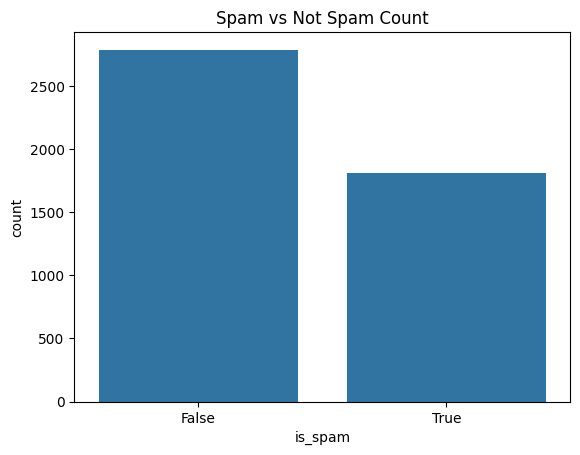

In [51]:
data['is_spam'].value_counts()
sns.countplot(data=data, x='is_spam')
plt.title("Spam vs Not Spam Count")
plt.show()

# Data Preparation/Cleaning 

In [52]:
duplicate_rows = data.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_rows}")

Number of duplicate rows: 0


In [53]:

obj_cols = data.select_dtypes(include=['object']).columns.tolist()
print('Object columns:', obj_cols)
for c in obj_cols:
    data[c] = data[c].astype(str).str.strip().replace({'nan': None})


Object columns: ['word_freq_labs']


In [54]:
for c in list(obj_cols):
    vals = data[c].dropna().unique()
    # normalize values to lowercase strings for checking
    lower_vals = set([str(v).lower() for v in vals])
    if lower_vals and lower_vals.issubset({'yes','no','true','false','y','n','t','f'}):
        data[c] = data[c].str.lower().map({'yes':1,'y':1,'true':1,'t':1,'no':0,'n':0,'false':0,'f':0})


In [55]:
# For any remaining object columns, attempt numeric conversion (non-convertible -> NaN)
for c in data.select_dtypes(include=['object']).columns:
    data[c] = pd.to_numeric(data[c], errors='coerce')

num_cols = data.select_dtypes(include=[np.number]).columns.tolist()
for c in num_cols:
    if data[c].isnull().any():
        med = data[c].median()
        data[c] = data[c].fillna(med)


In [56]:
if 'is_spam' in data.columns:
    data['is_spam'] = pd.to_numeric(data['is_spam'], errors='coerce').fillna(0).astype(int)
else:
    print("Warning: 'is_spam' column not found in dataset.")

clean_data = data.copy()
print('Cleaned shape:', clean_data.shape)
clean_data.head()


Cleaned shape: (4601, 59)


,Unnamed: 0,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,is_spam
0,0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


Exploratory Data Analysis (EDA) and Visualizations


Exploratory Data Analysis is performed to understand the distribution of the target variable and the relationship between features.


<Axes: xlabel='is_spam'>

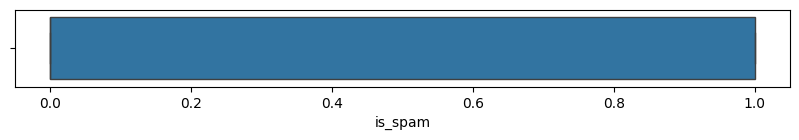

In [61]:
# Analyzing price data
plt.figure(figsize=(10, 1))
sns.boxplot(x='is_spam', data=clean_data)

SPAM Word Cloud: Automatically removing top feature: 'Unnamed: 0'
NON-SPAM Word Cloud: Automatically removing top feature: 'Unnamed: 0'


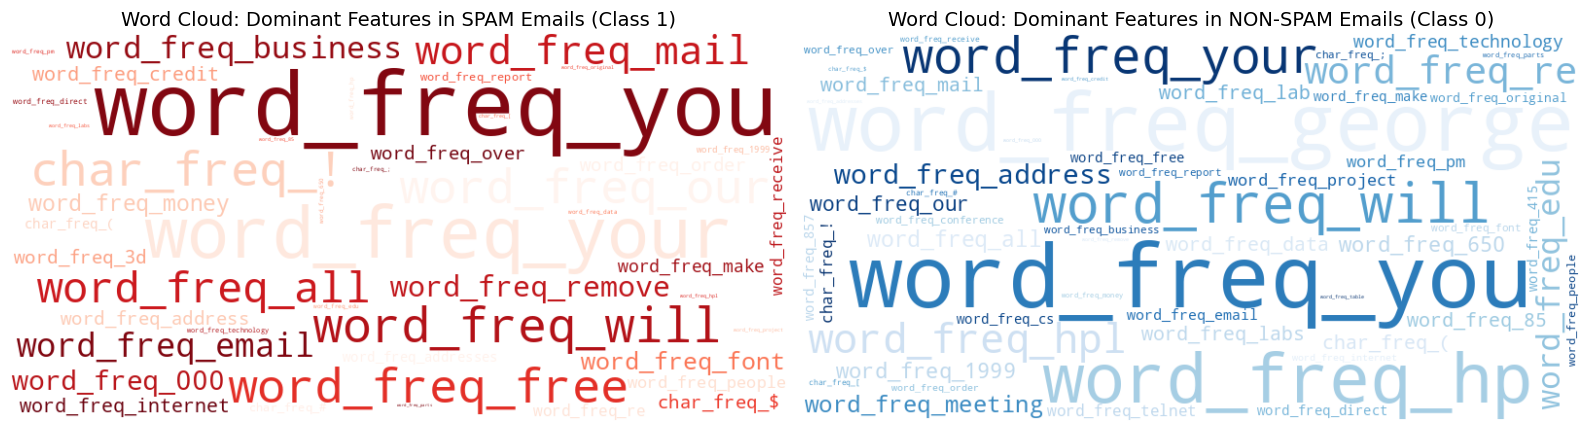

In [70]:
from wordcloud import WordCloud

feature_cols = [col for col in clean_data.columns if col != 'is_spam' and not col.startswith('capital_run')]

avg_frequencies = clean_data.groupby('is_spam')[feature_cols].mean()
spam_freq_series = avg_frequencies.loc[1]

spam_freq_series = spam_freq_series[spam_freq_series > 1e-6] 

if not spam_freq_series.empty:
    unwanted_top_feature_name = spam_freq_series.idxmax()
    print(f"SPAM Word Cloud: Automatically removing top feature: '{unwanted_top_feature_name}'")
    spam_freq_series = spam_freq_series.drop(unwanted_top_feature_name)

spam_freq_dict = spam_freq_series.to_dict()

wc_spam = WordCloud(
    background_color='white', 
    width=800, 
    height=400, 
    colormap='Reds',
    normalize_plurals=False
)
wc_spam.generate_from_frequencies(spam_freq_dict)
non_spam_freq_series = avg_frequencies.loc[0]

non_spam_freq_series = non_spam_freq_series[non_spam_freq_series > 1e-6]

if not non_spam_freq_series.empty:
    unwanted_top_feature_name_nonspam = non_spam_freq_series.idxmax()
    print(f"NON-SPAM Word Cloud: Automatically removing top feature: '{unwanted_top_feature_name_nonspam}'")
    non_spam_freq_series = non_spam_freq_series.drop(unwanted_top_feature_name_nonspam)

non_spam_freq_dict = non_spam_freq_series.to_dict()

wc_non_spam = WordCloud(
    background_color='white', 
    width=800, 
    height=400, 
    colormap='Blues',
    normalize_plurals=False
)
wc_non_spam.generate_from_frequencies(non_spam_freq_dict)
plt.figure(figsize=(16, 7))

plt.subplot(1, 2, 1)
plt.imshow(wc_spam, interpolation='bilinear')
plt.axis("off")
plt.title('Word Cloud: Dominant Features in SPAM Emails (Class 1)', fontsize=14)

# Plot 2: Non-Spam
plt.subplot(1, 2, 2)
plt.imshow(wc_non_spam, interpolation='bilinear')
plt.axis("off")
plt.title('Word Cloud: Dominant Features in NON-SPAM Emails (Class 0)', fontsize=14)

plt.tight_layout()
plt.show()

Removing unwanted feature: Unnamed: 0


/tmp/ipykernel_1980/22248663.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


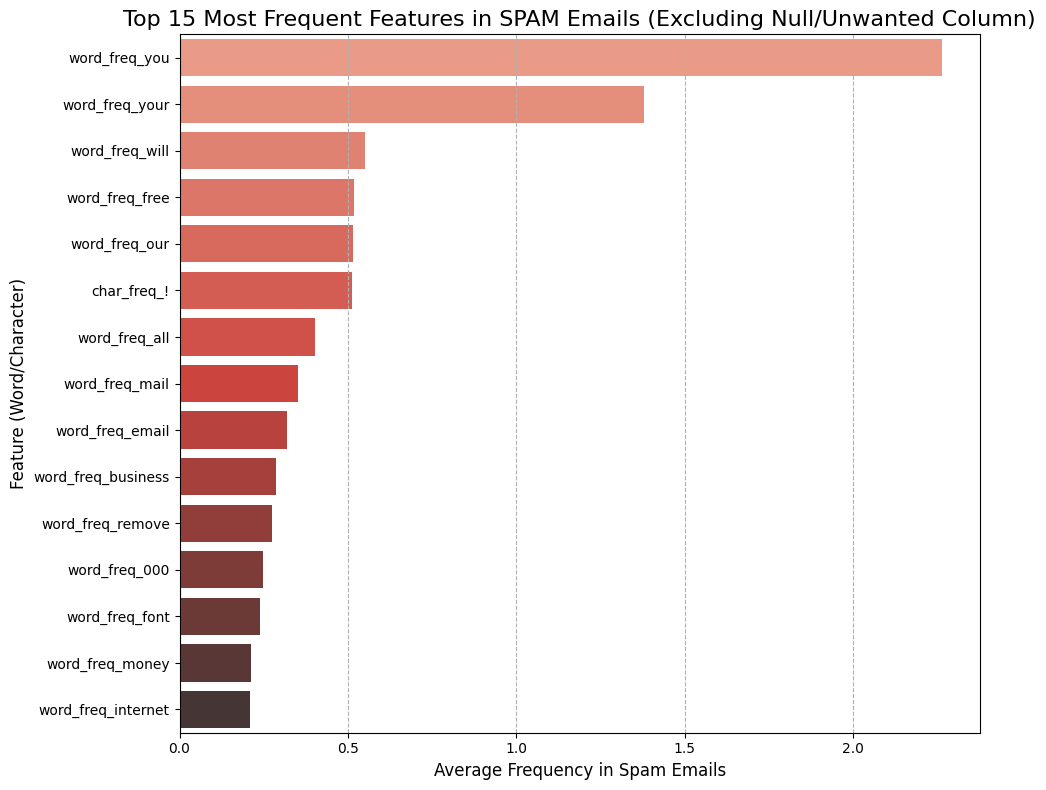

In [68]:
unwanted_top_feature = top_15_spam_words.index[0] 
print(f"Removing unwanted feature: {unwanted_top_feature}")

# 2. Re-create the feature list, excluding the unwanted feature
feature_cols = [
    col for col in clean_data.columns 
    if col != 'is_spam' 
    and not col.startswith('capital_run')
    and col != unwanted_top_feature # <--- NEW CONDITION ADDED HERE
]

# 3. Recalculate and Replot (Rest of your code remains the same)
spam_freqs = clean_data[clean_data['is_spam'] == 1][feature_cols].mean()
top_15_spam_words = spam_freqs.sort_values(ascending=False).head(15)

# 4. Create the Bar Chart (Your existing plotting code)
plt.figure(figsize=(10, 8))
sns.barplot(
    x=top_15_spam_words.values,
    y=top_15_spam_words.index,
    palette='Reds_d',
    orient='h'
)
plt.title('Top 15 Most Frequent Features in SPAM Emails (Excluding Null/Unwanted Column)', fontsize=16)
plt.xlabel('Average Frequency in Spam Emails', fontsize=12)
plt.ylabel('Feature (Word/Character)', fontsize=12)
plt.grid(axis='x', linestyle='--')
plt.tight_layout()
plt.show()

In [58]:
X = clean_data.drop('is_spam', axis=1)
y = clean_data['is_spam'].astype(int)


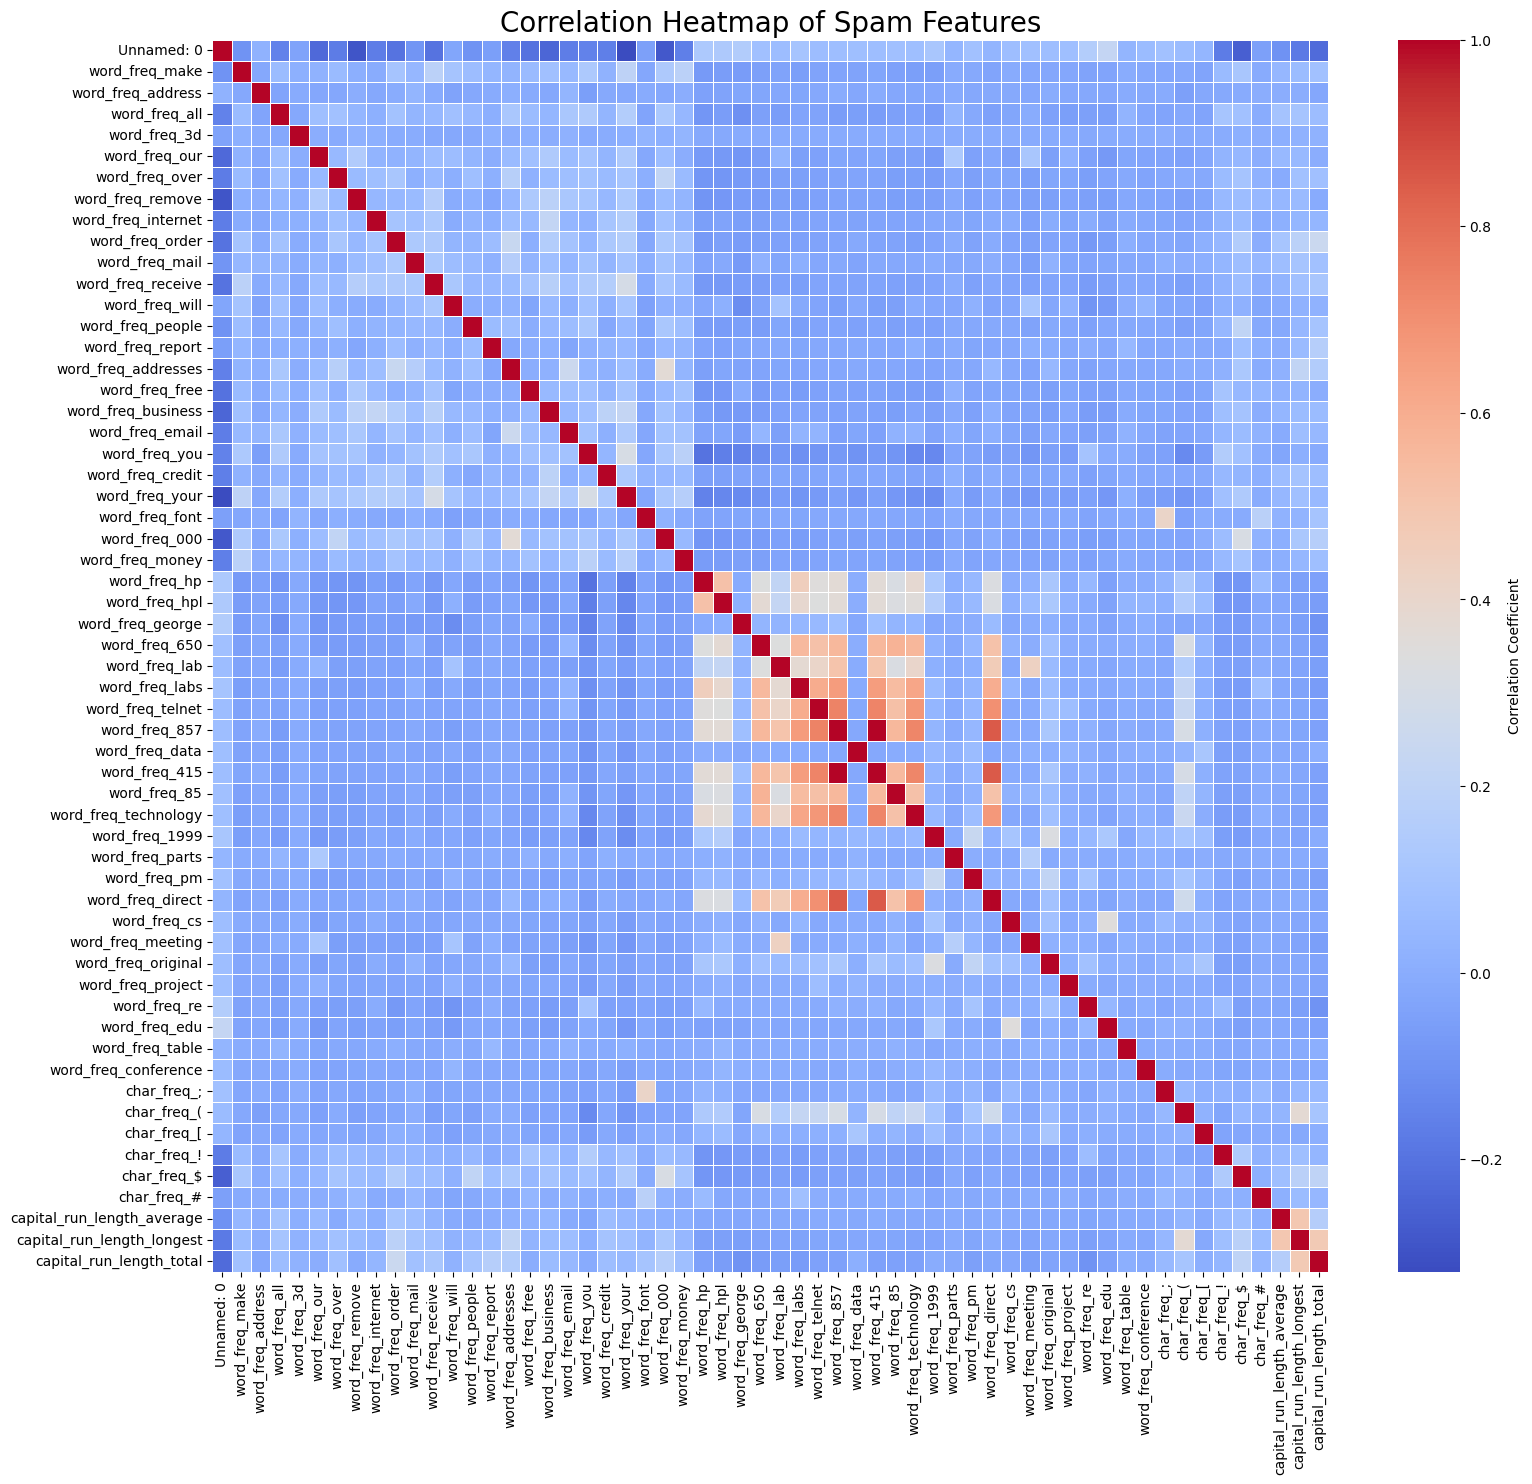

In [41]:
plt.figure(figsize=(18, 16))
correlation_matrix = X.corr() 

sns.heatmap(
    correlation_matrix, 
    annot=False,
    cmap='coolwarm', 
    fmt=".2f", 
    linewidths=.5, 
    cbar_kws={'label': 'Correlation Coefficient'}
)
plt.title('Correlation Heatmap of Spam Features', fontsize=20)
plt.show()

In [42]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)



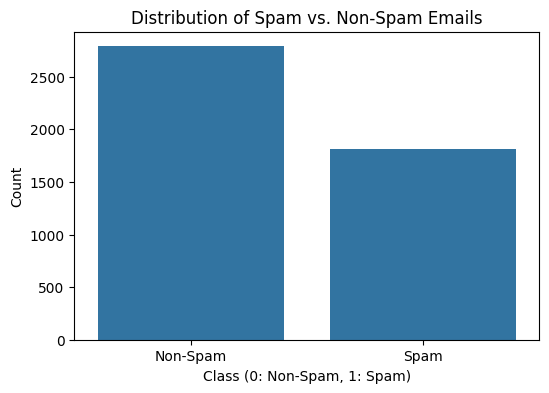

In [19]:
plt.figure(figsize=(6, 4))
sns.countplot(x=y)
plt.title('Distribution of Spam vs. Non-Spam Emails')
plt.xlabel('Class (0: Non-Spam, 1: Spam)')
plt.ylabel('Count')
plt.xticks([0, 1], ['Non-Spam', 'Spam'])
plt.show()


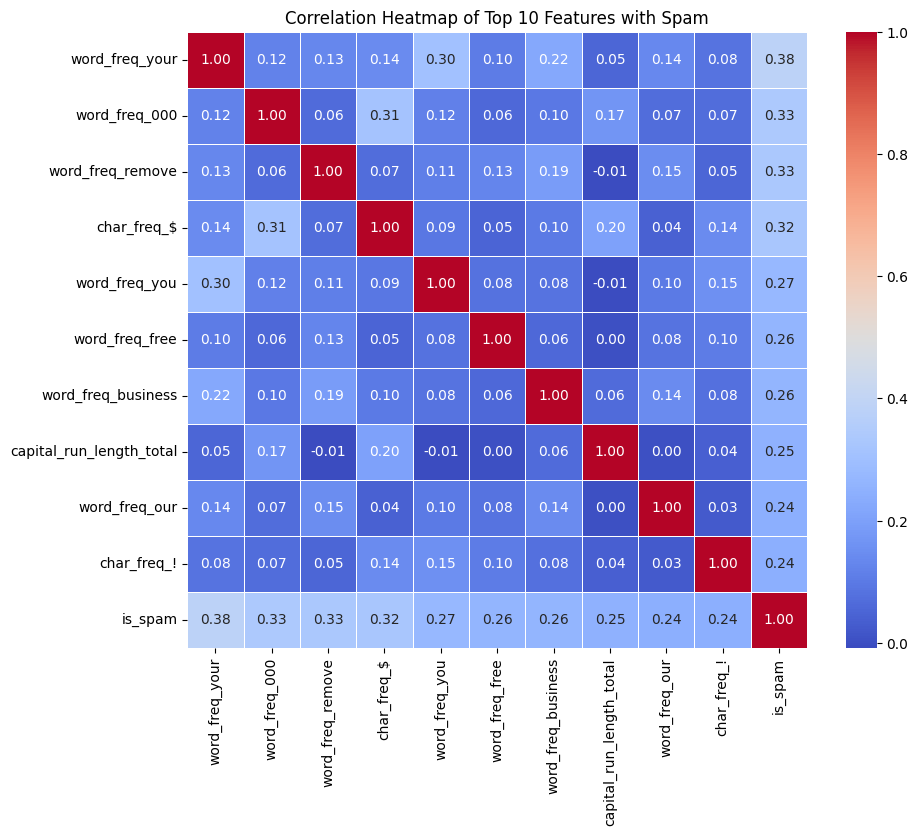

In [20]:
corr_matrix = clean_data.corr()
spam_corr = corr_matrix['is_spam'].sort_values(ascending=False)
top_10_features = spam_corr[1:11].index.tolist()

# Plot heatmap of top correlated features
features_for_heatmap = top_10_features + ['is_spam']
corr_subset = clean_data[features_for_heatmap].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_subset, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap of Top 10 Features with Spam')
plt.show()


In [21]:
from sklearn.decomposition import PCA

pca_full = PCA()
pca_full.fit(X_scaled)

cumulative_variance = np.cumsum(pca_full.explained_variance_ratio_)

variance_threshold = 0.995
n_components = np.where(cumulative_variance >= variance_threshold)[0][0] + 1

print(f"Number of components to retain {variance_threshold*100}% variance: {n_components}")

Number of components to retain 99.5% variance: 56


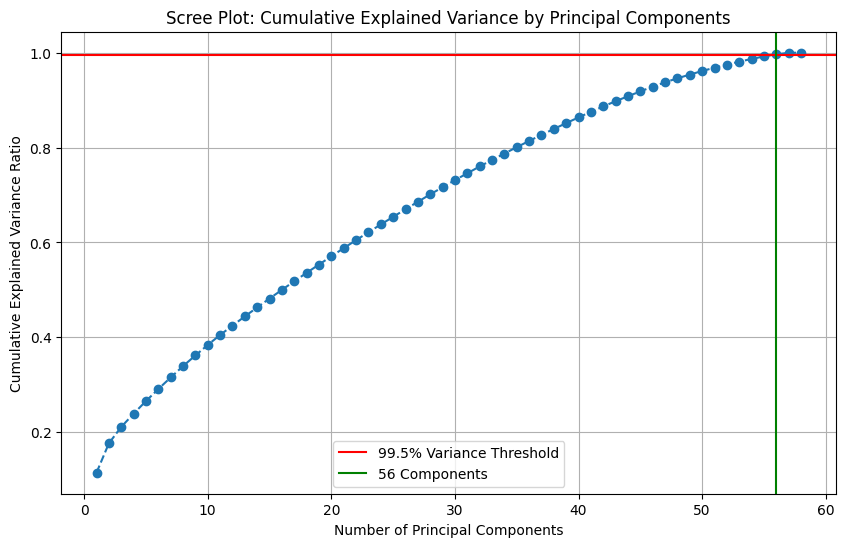

In [22]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--')
plt.axhline(y=variance_threshold, color='r', linestyle='-', label=f'{variance_threshold*100}% Variance Threshold')
plt.axvline(x=n_components, color='g', linestyle='-', label=f'{n_components} Components')
plt.title('Scree Plot: Cumulative Explained Variance by Principal Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.grid(True)
plt.legend()
plt.show()


# PCA   

In [23]:
pca_reduced = PCA(n_components=55)
X_reduced = pca_reduced.fit_transform(X_scaled)

# Convert the reduced data back to a DataFrame for easier handling
pca_columns = [f'PC{i+1}' for i in range(55)]
X_reduced_df = pd.DataFrame(X_reduced, columns=pca_columns)

print(f"Original feature count: {X_scaled.shape[1]}")
print(f"Reduced feature count: {X_reduced.shape[1]}")
print("\nFirst 5 rows of the PCA-reduced dataset:")
print(X_reduced_df.head())


Original feature count: 58
Reduced feature count: 55

First 5 rows of the PCA-reduced dataset:
        PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0 -0.888316 -0.502967 -0.675124 -0.306127 -0.169402 -0.364289  0.200906   
1 -1.387373 -2.418480  0.051671  0.447786 -0.330847 -0.830824  0.464100   
2 -1.739361 -5.143346  3.397442  1.023022  0.636856 -2.372368  2.381182   
3 -0.972903 -0.940521 -0.660292 -0.071896 -0.067667  0.698395 -0.313314   
4 -0.973748 -0.939564 -0.662325 -0.071801 -0.067859  0.698393 -0.312055   

        PC8       PC9      PC10  ...      PC46      PC47      PC48      PC49  \
0 -0.293245  0.808883 -0.598877  ... -0.221652  0.374977  0.500676  0.104232   
1  0.566475 -0.688724 -0.213430  ...  0.055504  0.001782  0.408245  0.132216   
2 -2.051619  1.202379  1.364050  ...  0.173931 -0.649747 -0.984828  0.049937   
3 -0.579535  0.087038  0.254604  ... -0.576665  0.781605  0.323412  0.516348   
4 -0.580646  0.085768  0.256117  ... -0.576770  0.7798

In [59]:

optimal_components = 18

pca_final = PCA(n_components=optimal_components)
X_final_reduced = pca_final.fit_transform(X_scaled) # X_scaled is the standardized feature data

pca_final_columns = [f'PC{i+1}' for i in range(optimal_components)]
X_final_reduced_df = pd.DataFrame(data=X_final_reduced, columns=pca_final_columns)

print(f"Final Reduced Data Shape: {X_final_reduced_df.shape}")
print("\nTop 5 rows of the Final Reduced Feature Set:")
print(X_final_reduced_df.head())

total_explained_variance = sum(pca_final.explained_variance_ratio_) * 100
print(f"\nTotal Variance Captured by {optimal_components} Components: {total_explained_variance:.2f}%")

Final Reduced Data Shape: (4601, 18)

Top 5 rows of the Final Reduced Feature Set:
        PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0 -0.888316 -0.502967 -0.675124 -0.306127 -0.169402 -0.364289  0.200906   
1 -1.387373 -2.418480  0.051671  0.447786 -0.330847 -0.830824  0.464100   
2 -1.739361 -5.143346  3.397442  1.023022  0.636856 -2.372368  2.381182   
3 -0.972903 -0.940521 -0.660292 -0.071896 -0.067667  0.698395 -0.313314   
4 -0.973748 -0.939564 -0.662325 -0.071801 -0.067859  0.698393 -0.312055   

        PC8       PC9      PC10      PC11      PC12      PC13      PC14  \
0 -0.293245  0.808883 -0.598877  1.170991 -0.298223 -0.126370  0.167923   
1  0.566475 -0.688724 -0.213430 -0.242648 -0.477261  0.124678 -0.589732   
2 -2.051619  1.202379  1.364050  0.696197  1.154902 -1.198843  0.276669   
3 -0.579535  0.087038  0.254604 -0.393289  0.099829  0.073515 -0.426863   
4 -0.580646  0.085768  0.256117 -0.392909  0.099806  0.072816 -0.427210   

       PC15    